# Lab 8
# AIM:Write a python program to perform K-Means clustering on Brest Cancer Data

Jwalit Shah | CE121

## Import Library and dataset

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
digits=load_breast_cancer()
digits.data.shape

(569, 30)

In [2]:
kmeans=KMeans(n_clusters=10,random_state=121)
prediction=kmeans.fit_predict(digits.data)
len(prediction)

569

In [3]:
kmeans.cluster_centers_.shape

(10, 30)

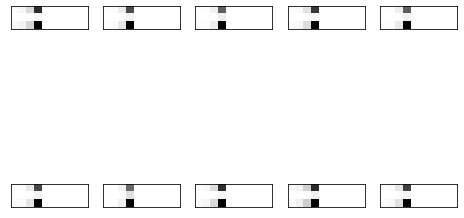

In [4]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,5,figsize=(8,6))

centers=kmeans.cluster_centers_.reshape(10,3,10)
for axi,center in zip(ax.flat,centers):
  axi.set(xticks=[],yticks=[])
  axi.imshow(center,interpolation='nearest',cmap=plt.cm.binary)
  

In [5]:
import numpy as np
from scipy.stats import mode
labels=np.zeros_like(prediction)
for i in range(10):
  mask=(prediction==i)
  labels[mask]=mode(digits.target[mask])[0]

Print accuracy

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target,labels)

0.9121265377855887

Print Confusion matrix

Text(91.68, 0.5, 'predicted label')

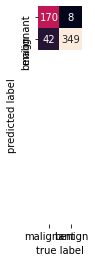

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat=confusion_matrix(digits.target,labels)
ax=sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=digits.target_names,yticklabels=digits.target_names)
ax.set_ylim(10.0,0)
plt.xlabel('true label')
plt.ylabel('predicted label')